In [ ]:
pwd

In [ ]:
cd /mmfs1/data/aglinska/BC-fMRI-AE

In [3]:
import pandas as pd
import ants
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy

In [4]:
df = pd.read_csv('./Data/ABIDE_df.csv')
df = df.iloc[~pd.isna(df['bids_folder'].values)]

In [5]:
epi_rois = ants.image_read('./Data/YeoAtlas/epi_rois.nii.gz')
#np.unique(epi_rois.numpy().flatten())

In [6]:
%%time
s = 75
sub = df['bids_folder'].values[s]
epi = ants.image_read(f'../data/ABIDE/Derivatives/cpac_nofilt_global/{sub}/ses-1/func/{sub}_ses-1_preproc.nii.gz')
#epi_mask = ants.image_read(f'../data/ABIDE/Derivatives/cpac_nofilt_global/{sub}/ses-1/func/{sub}_ses-1_preproc.nii.gz')
#epi = epi.iMath_normalize()
n_rois = np.arange(1,52)
roi_arr = np.array([epi[epi_rois.numpy()==i].mean(axis=0) for i in n_rois])

CPU times: user 3.53 s, sys: 2.48 s, total: 6.01 s
Wall time: 6.23 s


In [7]:
roi_arr.shape

(51, 206)

In [8]:
#epi_arr.reshape(epi.shape)

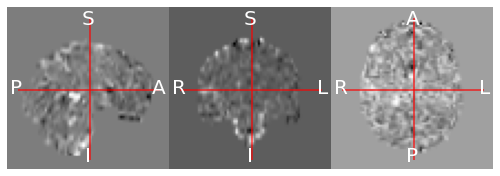

In [9]:
epi.slice_image(axis=3,idx=0).plot_ortho(flat=True)

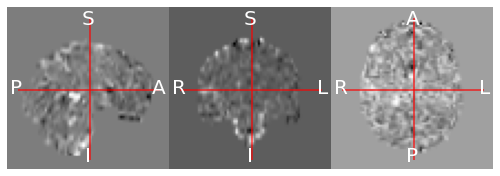

In [10]:
epi_arr = epi.numpy().reshape(-1,2)
back = epi_arr.reshape(epi.shape)[:,:,:,0]
epi.slice_image(axis=3,idx=0).new_image_like(back).plot_ortho(flat=True)

In [11]:
epi_arr = epi.numpy().reshape(-1,epi.shape[-1])
print(epi_arr.shape)
print(roi_arr.shape)

(271633, 206)
(51, 206)


In [12]:
epi_arr[0::100].shape

(2717, 206)

In [13]:
roi_arr.shape

(51, 206)

In [24]:
epi_arr[77755,:].mean()

5.9257434e-07

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
from tqdm.notebook import tqdm_notebook as tqdm
from tqdm import tqdm

In [36]:
nvox = epi_arr.shape[0]
nroi = 51
c_arr = np.zeros((51,nvox))

for r in tqdm(range(51)):
    for v in range(nvox):
        c = np.corrcoef(epi_arr[v,:],roi_arr[r,:])[0,1]
        c_arr[r,v] = c


#c_arr = scipy.signal.correlate2d(epi_arr[0::100],roi_arr.transpose(),mode='same')

100%|██████████| 51/51 [15:45<00:00, 18.53s/it]


In [37]:
c_arr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# plt.figure(figsize=(5,15))
# sns.heatmap(epi_arr[0::50,:]>.001,cmap='gray')